In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('paper')

In [2]:
def get_centered_grid(xlist, ylist, poolresults):  
    # assumes uniformly spaced values in x and y (can have different lengths)
    dx = xlist[1]-xlist[0]
    dy = ylist[1]-ylist[0]

    xgrid = [x - dx/2 for x in xlist] + [xlist[-1]+dx/2]
    ygrid = [y - dy/2 for y in ylist] + [ylist[-1]+dy/2]

    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.array(poolresults).reshape(len(ylist),len(xlist))

    return X,Y,Z

def relativelyprime(num1, num2):
    mn = min(num1, num2) 
    for i in range(1, mn+1): 
         if num1%i==0 and num2%i==0: 
             hcf = i 
    if hcf == 1: 
         return True
    else: 
         return False

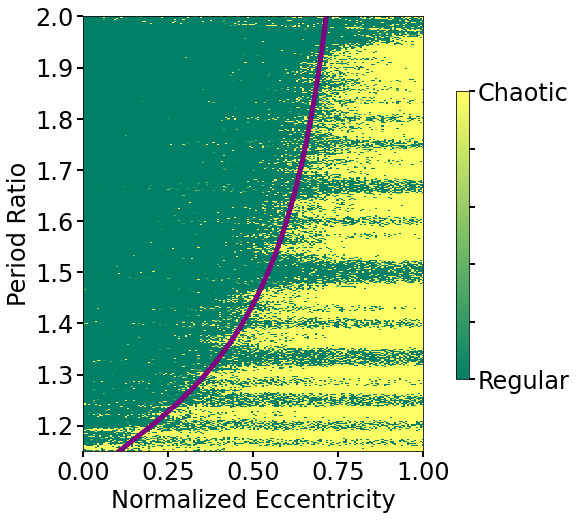

In [8]:
plt.style.use('paper')
fig, ax = plt.subplots(figsize=(9, 8))

mu=1e-4
emax = 1
P12 = 0.63
eps = 2*mu/3
Pmin = 1/1.15# 1/(1+3/2*1.46*(eps)**(2/7))
Pmax = 1/2
NPs = 960
Nes = 160
P23s = np.linspace(Pmin, Pmax, NPs)
etildes = np.linspace(0, emax, Nes)

deltas = (1-P23s**(2/3))/(2*mu/3)**(1/4)
res2p = np.load('2p10Mearth.npy')

X,Y,Z = get_centered_grid(1/P23s, etildes, np.array(res2p)-2)
im = ax.pcolormesh(Y, X, Z, vmin=0, vmax=1, cmap="summer", rasterized=True)
ax.plot(np.exp(-2.2*deltas**(-4/3)), 1/P23s, lw=5, color='purple')


ax.set_ylabel(r"Period Ratio", fontsize=24)
ax.set_xlabel(r"Normalized Eccentricity", fontsize=24)
ax.set_ylim([(1/P23s).min(), (1/P23s).max()])
ax.set_xlim([etildes.min(), etildes.max()])

fig.subplots_adjust(right=0.65)
cbar_ax = fig.add_axes([0.7, 0.25, 0.02, 0.5])
#cbar_ax.axis('off')
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.tick_params(labelsize=24)
cb.set_ticks([im.colorbar.vmin + t*(im.colorbar.vmax-im.colorbar.vmin) for t in cb.ax.get_yticks()])
cb.set_ticklabels(['Regular', '', '', '', '', 'Chaotic'])

ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=8)

In [4]:
1-(1/1.2)**(2/3)

0.11445119234782408

In [6]:
1-(1/1.5)**(2/3)

0.23685717163111208